In [1]:
import os
import pandas as pd
from utils import save_dataframe_as_latex

#database = 'a5a'
#database = 'abalone'
#database = 'CPU_SMALL'
database = 'Diabetes'
#database = 'w3a'

#database = 'eunite2001'

path = '/Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/Basic-measures/'
directory = path + f'results/{database}/accuracy_time_stats'  # Replace this with the path to your directory
verbose_path = path + f'results/{database}/verboses'
analysis_files = path + f'analysis/{database}'
plot_path = f'{analysis_files}/plot/'
tables_path = f'{analysis_files}/latex-tables/'

## columns names 
percent_column = 'percent'
n_components_column = 'n_components' 
score_column = 'Mean Score in test'		
time_column = 'Mean Training Time'
damping_column = 'damping'


# Get a list of all files in the directory
files = [file for file in os.listdir(directory) if os.path.isfile(os.path.join(directory, file))]

# Now 'files' contains a list of the names of all files in the directory
print(files)

# Separate files with "classification" in their name
ridge_files = [file for file in files if "ridge" in file]
ridge_files.sort()

# Separate other files
svm_files = [file for file in files if file not in ridge_files]
svm_files.sort()
damping_formula = lambda accuracy, time : accuracy / time *100

score_column, time_column = ('Mean Score in test', 'Mean Training Time')

def damping_df(df):
    df[damping_column] = damping_formula(df[score_column],df[time_column])
    return df

 
# Create a DataFrame for ridge files
ridge_data = pd.DataFrame()
ridge_list = []
ridge_list_names = []
ridge_data_verbose = pd.DataFrame()
for file in ridge_files:
    # mean
    file_path = os.path.join(directory, file)
    data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed
    #data[percent_column] = data.apply(compute_percent, axis=1)

    data = damping_df(data)
    ridge_list_names.append(file)
    data = data.sort_values(by=n_components_column)
    data['File'] = file  # Add a column to identify the file 
    ridge_data = pd.concat([ridge_data, data], ignore_index=True)
    ridge_list.append(data)

    # verbose
    file_path = os.path.join(verbose_path, file)
    data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed
    data = data.sort_values(by=n_components_column)
    data['File'] = file  # Add a column to identify the file
    ridge_data_verbose = pd.concat([ridge_data_verbose, data], ignore_index=True) 


svm_data = pd.DataFrame()
svm_data_verbose = pd.DataFrame()
svm_list = []
svm_list_names = []
for file in svm_files:
    file_path = os.path.join(directory, file)
    data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed
    #data[percent_column] = data.apply(compute_percent, axis=1)
    #data = data.sort_values(by=n_components_column)
    data = damping_df(data)
    data['File'] = file  # Add a column to identify the file
    data = data.sort_values(by=n_components_column)
    svm_data = pd.concat([svm_data, data], ignore_index=True)
    svm_list.append(data)
    svm_list_names.append(file)
    # verbose
    file_path = os.path.join(verbose_path, file)
    data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed
    #data[percent_column] = data.apply(compute_percent, axis=1)
    #data = data.sort_values(by=n_components_column)
    data['File'] = file  # Add a column to identify the file
    svm_data_verbose = pd.concat([svm_data_verbose, data], ignore_index=True)

print('Ridge files')
print(svm_list_names)
print('SvM files')
print(svm_list_names)
svm_data

std_column = 'Std Score in test'
if (ridge_list[0][std_column] == 0).all():
    std_column = 'cv_std_test_score'

print(std_column)
svm_data

['Random_Fourier_features_and_SVC_Diabetes_cv_5.csv', 'Kernel_SVM_Diabetes_cv_5.csv', 'Kernel_ridge_classification_Diabetes_cv_5.csv', 'Random_Fourier_features_and_ridge_classification_Diabetes_cv_5.csv', 'Nystrom_and_ridge_classification_Diabetes_cv_5.csv', 'Nystrom_and_SVC_Diabetes_cv_5.csv']
Ridge files
['Kernel_SVM_Diabetes_cv_5.csv', 'Nystrom_and_SVC_Diabetes_cv_5.csv', 'Random_Fourier_features_and_SVC_Diabetes_cv_5.csv']
SvM files
['Kernel_SVM_Diabetes_cv_5.csv', 'Nystrom_and_SVC_Diabetes_cv_5.csv', 'Random_Fourier_features_and_SVC_Diabetes_cv_5.csv']
Std Score in test


,percent,n_components,Mean Score in test,Std Score in test,Mean Training Time,Std Training Time,Mean Best Score in CV,Std Best Score in CV,cv_mean_test_score,cv_std_test_score,cv_mean_fit_time,cv_std_fit_time,damping,File
0,100,768,0.774740,0.039900,0.028363,0.001262,0.776882,0.016686,0.776882,0.036194,0.013573,0.001723,2731.481520,Kernel_SVM_Diabetes_cv_5.csv
1,1,7,0.766927,0.033829,0.010744,0.001998,0.762586,0.011951,0.762586,0.036101,0.010390,0.002295,7138.443330,Nystrom_and_SVC_Diabetes_cv_5.csv
2,2,15,0.777344,0.031331,0.015823,0.005842,0.774708,0.015020,0.774708,0.036877,0.015082,0.002029,4912.614089,Nystrom_and_SVC_Diabetes_cv_5.csv
3,4,30,0.772135,0.038516,0.022535,0.010518,0.774715,0.017641,0.774715,0.035088,0.014540,0.001184,3426.433446,Nystrom_and_SVC_Diabetes_cv_5.csv
4,5,38,0.774740,0.038162,0.032132,0.012998,0.775581,0.016226,0.775581,0.034026,0.016207,0.001991,2411.126549,Nystrom_and_SVC_Diabetes_cv_5.csv
5,7,53,0.772135,0.035778,0.050028,0.020808,0.776466,0.018486,0.776466,0.036813,0.016953,0.002635,1543.416754,Nystrom_and_SVC_Diabetes_cv_5.csv
6,9,69,0.774740,0.035011,0.055615,0.015768,0.774708,0.015985,0.774708,0.036755,0.018225,0.001131,1393.043485,Nystrom_and_SVC_Diabetes_cv_5.csv
7,10,76,0.774740,0.035011,0.082730,0.029669,0.774273,0.015389,0.774273,0.036535,0.020712,0.002805,936.462181,Nystrom_and_SVC_Diabetes_cv_5.csv
8,12,92,0.773437,0.036920,0.060204,0.037378,0.774280,0.015383,0.774280,0.036064,0.022540,0.001695,1284.686287,Nystrom_and_SVC_Diabetes_cv_5.csv
9,13,99,0.774740,0.038162,0.086283,0.024004,0.773838,0.014808,0.773838,0.036169,0.023253,0.003127,897.905574,Nystrom_and_SVC_Diabetes_cv_5.csv


In [2]:
def show_dataframe(dataframe, column, ascending = True, decimals = 3, only_relevant_columns = True, n_rows = None):
      pd.reset_option('display.max_colwidth')
      pd.set_option('display.max_rows', n_rows)
      dataframe =  pd.DataFrame(dataframe).round(decimals).sort_values(by=column, ascending= ascending)

      if only_relevant_columns:
            dataframe = dataframe[["File","percent", column, "n_components" ]]
   
      return dataframe

score_column = ridge_data.columns[2]
time_column = ridge_data.columns[4]
name_column = 'File'

def show_verbose(dataframe, column = n_components_column, ascending = False, decimals = 3, n_rows = None):
      pd.set_option('display.max_colwidth', None)
      pd.set_option('display.max_rows', n_rows)
      dataframe =  pd.DataFrame(dataframe).round(decimals).sort_values(by=column, ascending= ascending)
      return dataframe[["Best Parameters","File","percent", "n_components" ]]


In [3]:
# get tables 
columns = [score_column, time_column, damping_column ]
for column in columns:
    column_name = column.replace(' ', '_').replace('_', '-')
    df = show_dataframe(ridge_data, column, ascending=False)
    save_dataframe_as_latex(df, tables_path, f'Ridge-{column_name}-result')
    df = show_dataframe(svm_data, column, ascending=False)
    save_dataframe_as_latex(df, tables_path, f'SVM-{column_name}-result')

DataFrame saved as LaTeX table to /Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/Basic-measures/analysis/Diabetes/latex-tables/Ridge-Mean-Score-in-test-result.tex
DataFrame saved as LaTeX table to /Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/Basic-measures/analysis/Diabetes/latex-tables/SVM-Mean-Score-in-test-result.tex
DataFrame saved as LaTeX table to /Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/Basic-measures/analysis/Diabetes/latex-tables/Ridge-Mean-Training-Time-result.tex
DataFrame saved as LaTeX table to /Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/Basic-measures/analysis/Diabetes/latex-tables/SVM-Mean-Training-Time-result.tex
DataFrame saved as LaTeX table to /Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/Basic-measures/analysis/Diabetes/latex-tables/Ridge-damping-result.tex
DataFrame saved as LaTeX table to /Users/blancacanocamarero/repositorios/TFM/Ker

# Sort by score 

In [4]:

show_dataframe(svm_data, score_column, ascending=False)

,File,percent,Mean Score in test,n_components
31,Random_Fourier_features_and_SVC_Diabetes_cv_5.csv,23,0.780,176
2,Nystrom_and_SVC_Diabetes_cv_5.csv,2,0.777,15
15,Nystrom_and_SVC_Diabetes_cv_5.csv,23,0.777,176
28,Random_Fourier_features_and_SVC_Diabetes_cv_5.csv,18,0.776,138
27,Random_Fourier_features_and_SVC_Diabetes_cv_5.csv,17,0.776,130
0,Kernel_SVM_Diabetes_cv_5.csv,100,0.775,768
14,Nystrom_and_SVC_Diabetes_cv_5.csv,21,0.775,161
26,Random_Fourier_features_and_SVC_Diabetes_cv_5.csv,15,0.775,115
25,Random_Fourier_features_and_SVC_Diabetes_cv_5.csv,13,0.775,99
16,Nystrom_and_SVC_Diabetes_cv_5.csv,25,0.775,192


# Damping

In [5]:
show_dataframe(ridge_data, damping_column, ascending=False)

,File,percent,damping,n_components
17,Random_Fourier_features_and_ridge_classificati...,1,20219.319,7
18,Random_Fourier_features_and_ridge_classificati...,2,20073.701,15
1,Nystrom_and_ridge_classification_Diabetes_cv_5...,1,17926.426,7
19,Random_Fourier_features_and_ridge_classificati...,4,14460.431,30
2,Nystrom_and_ridge_classification_Diabetes_cv_5...,2,13804.649,15
3,Nystrom_and_ridge_classification_Diabetes_cv_5...,4,9876.482,30
20,Random_Fourier_features_and_ridge_classificati...,5,9289.687,38
25,Random_Fourier_features_and_ridge_classificati...,13,7350.212,99
21,Random_Fourier_features_and_ridge_classificati...,7,6376.078,53
23,Random_Fourier_features_and_ridge_classificati...,10,6261.673,76


# Plotting 
## Ridge

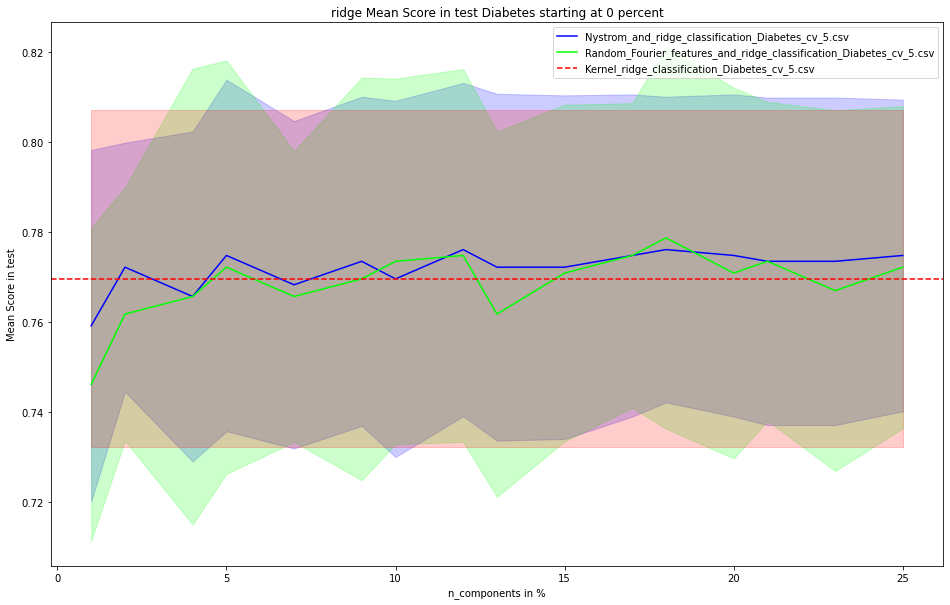

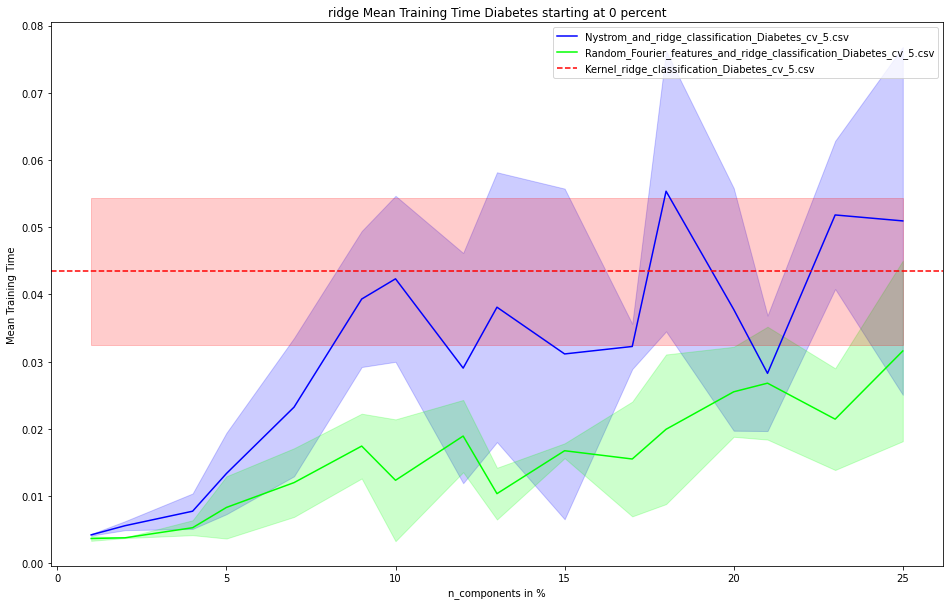

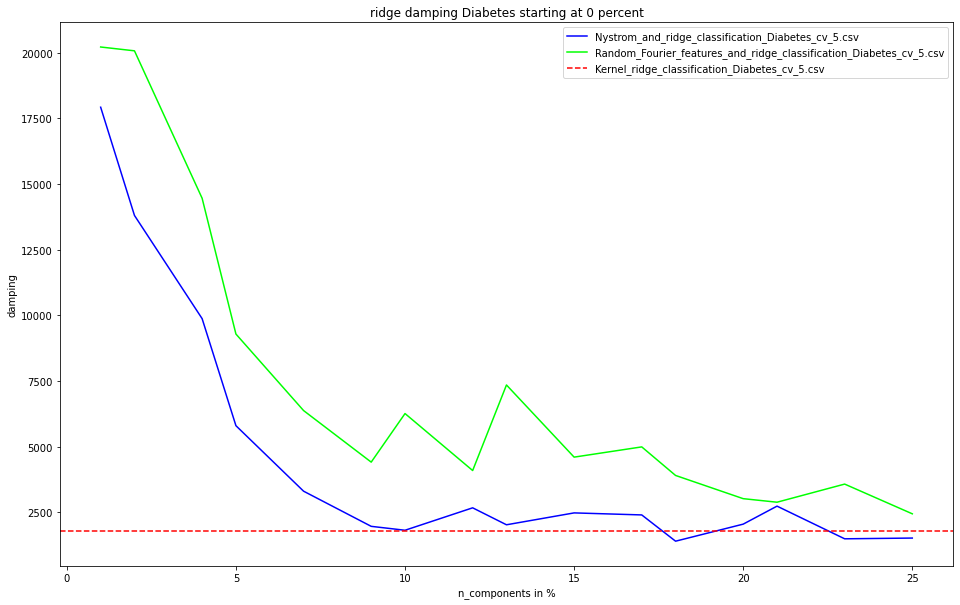

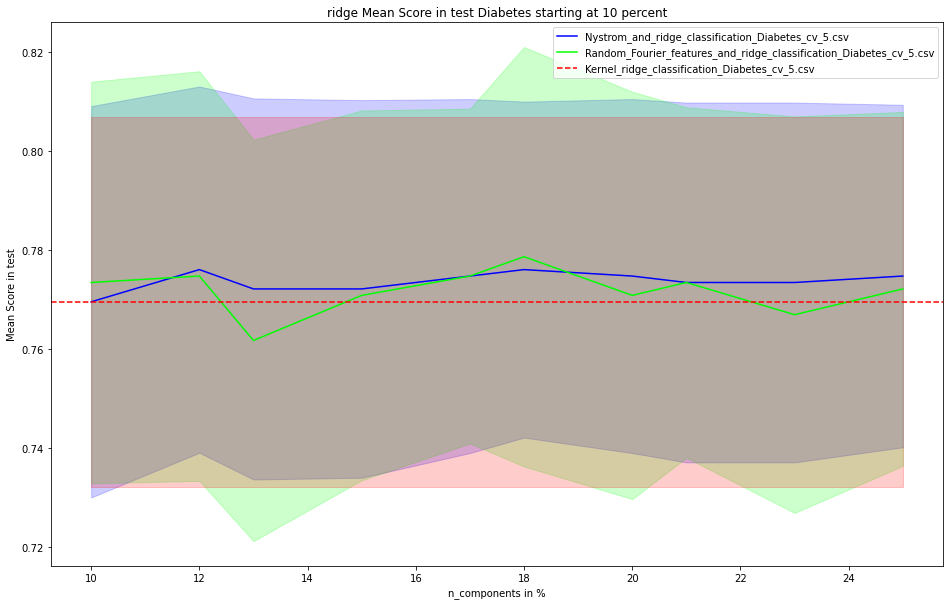

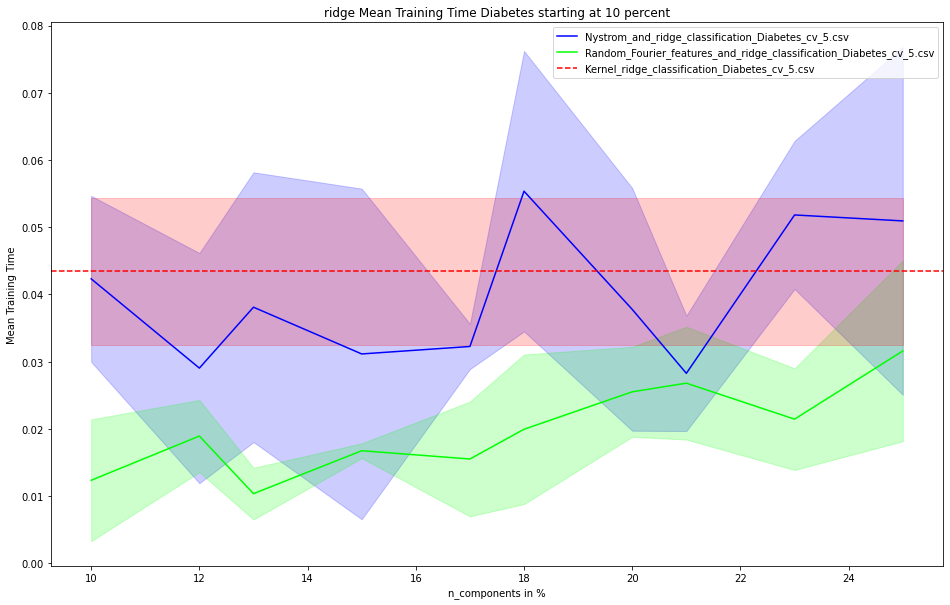

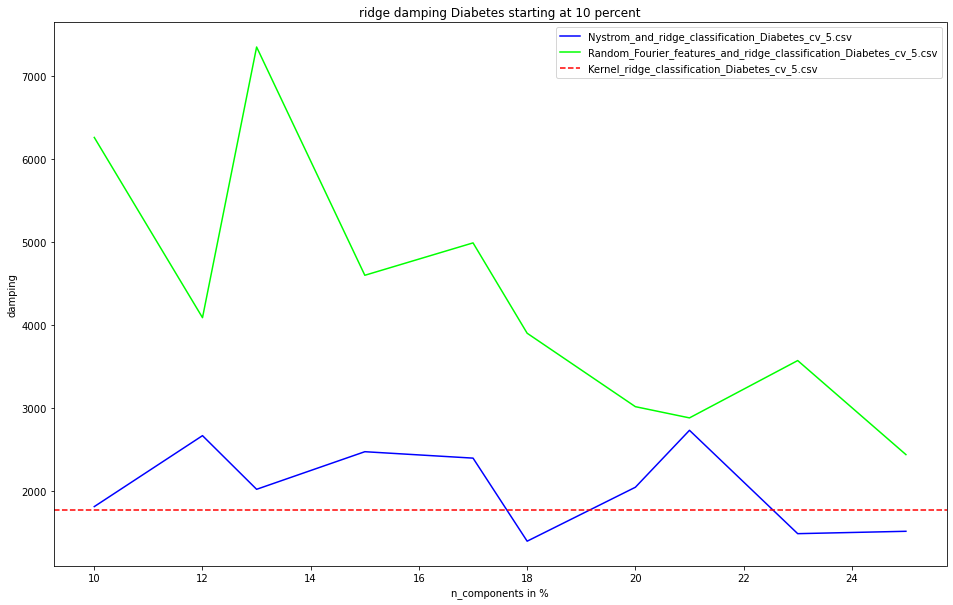

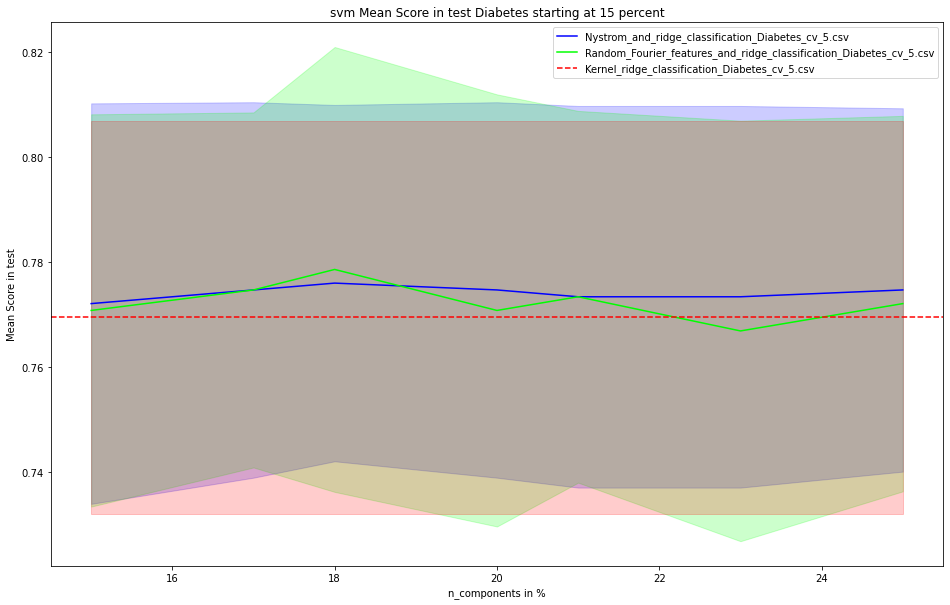

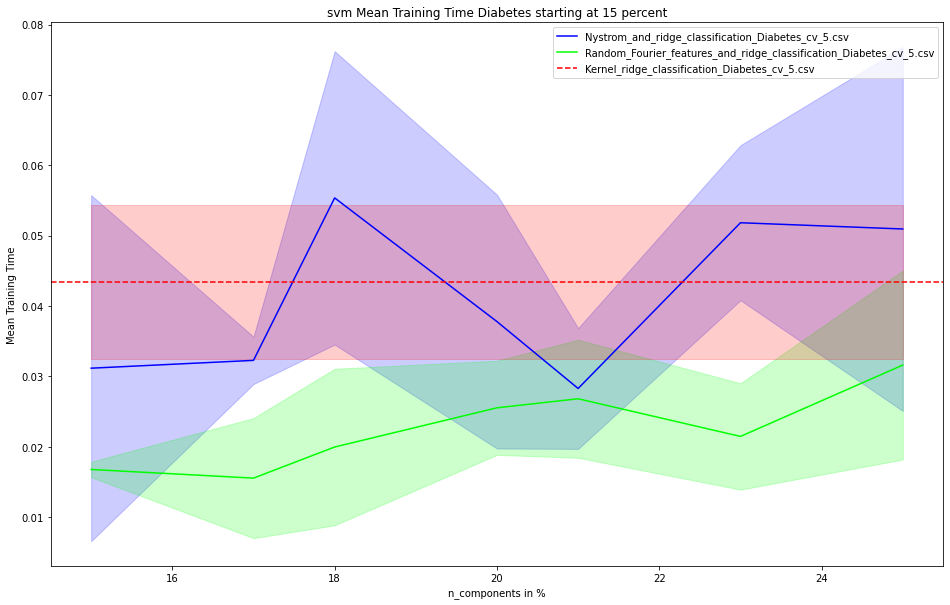

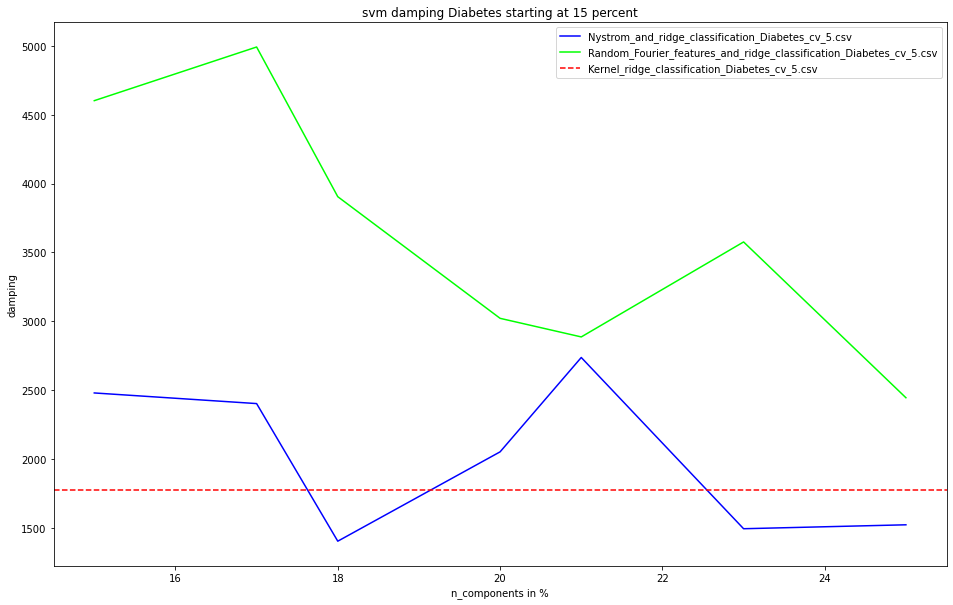

In [6]:
from plotting import view_plots_and_save_them

names_of_std_for_column = {score_column:'Std Score in test', 
    time_column:'Std Training Time',
    damping_column:False
}
if (ridge_list[0][names_of_std_for_column[score_column]] == 0).all():
    names_of_std_for_column = {score_column:'cv_std_test_score', 
        time_column:'cv_std_fit_time',
        damping_column:False
    }
    
columns = [score_column, time_column, damping_column ]

view_plots_and_save_them(df_list = ridge_list, df_list_names=ridge_list_names,
            names_of_std_for_column=names_of_std_for_column, type ='ridge',
            columns=columns, database=database, plot_path = plot_path,
            percent_of_n_components_bigger_than = 0)
view_plots_and_save_them(df_list = ridge_list, df_list_names=ridge_list_names,
            names_of_std_for_column=names_of_std_for_column, type ='ridge',
            columns=columns, database=database, plot_path = plot_path,
            percent_of_n_components_bigger_than = 10)
view_plots_and_save_them(df_list = ridge_list, df_list_names=ridge_list_names,
            names_of_std_for_column=names_of_std_for_column, type ='svm',
            columns=columns, database=database, plot_path = plot_path,
            percent_of_n_components_bigger_than = 15)

## SVM 

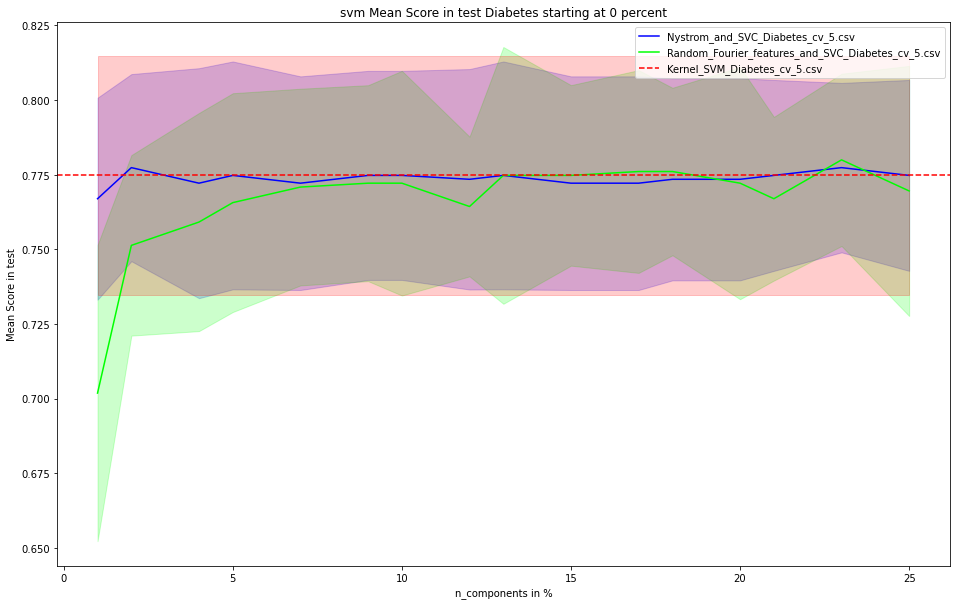

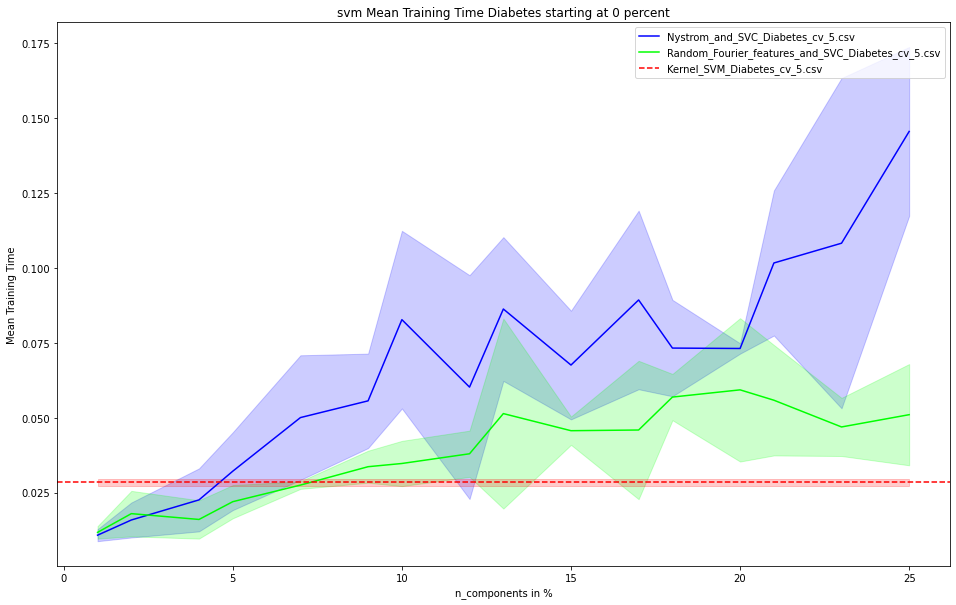

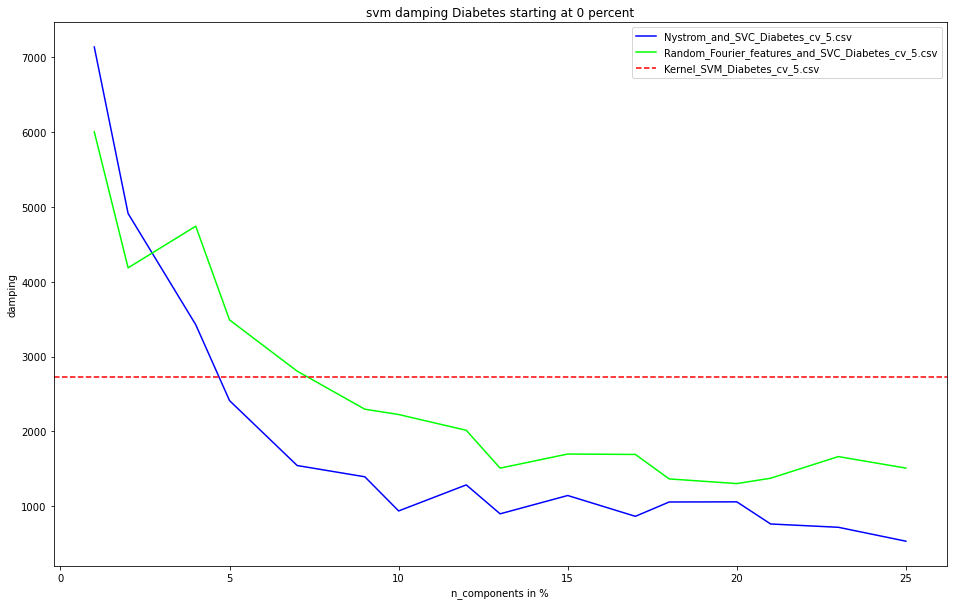

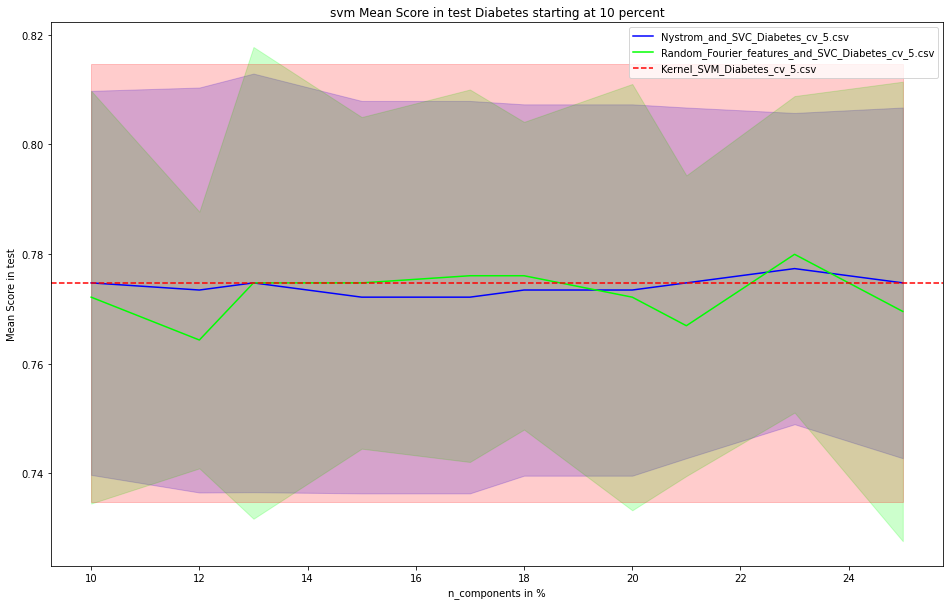

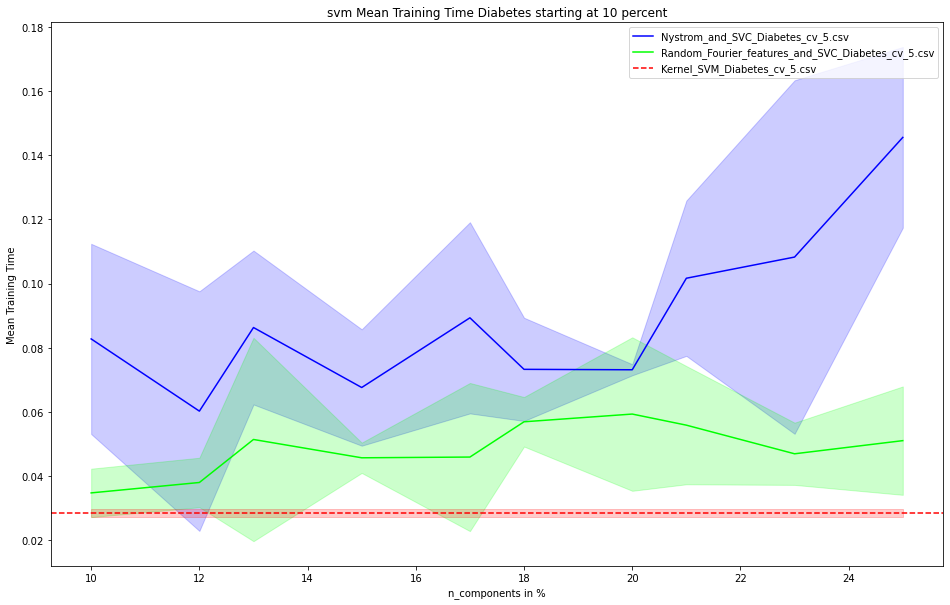

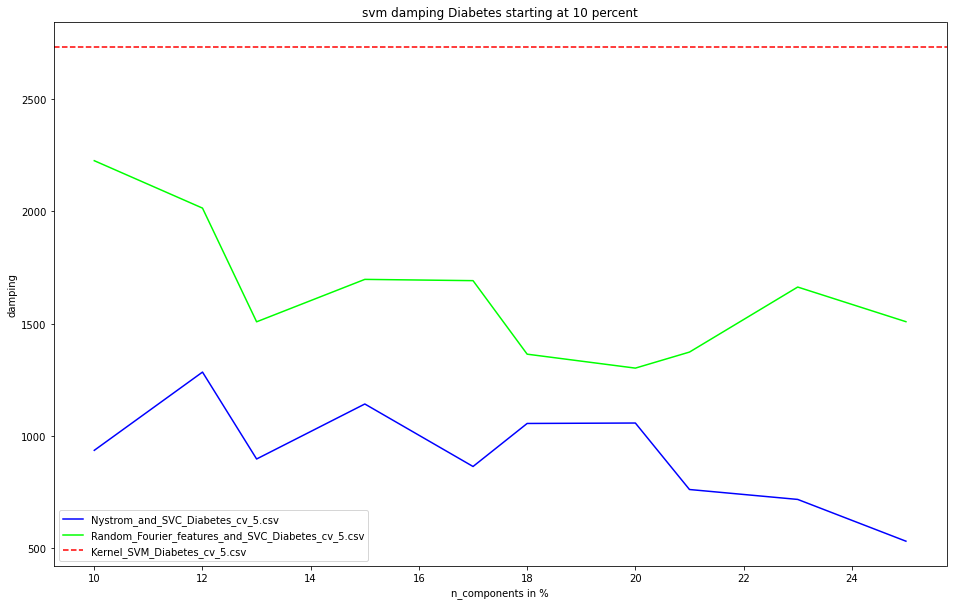

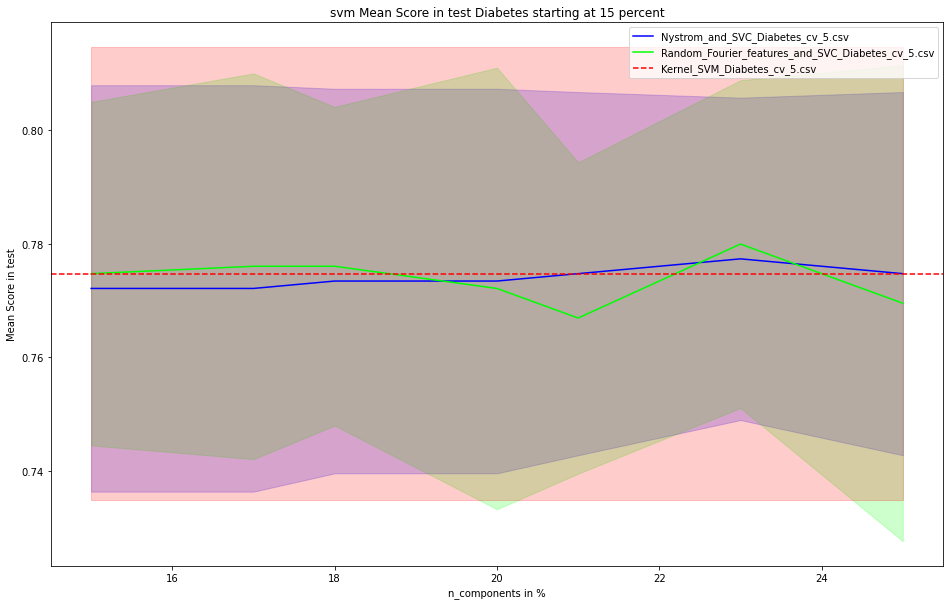

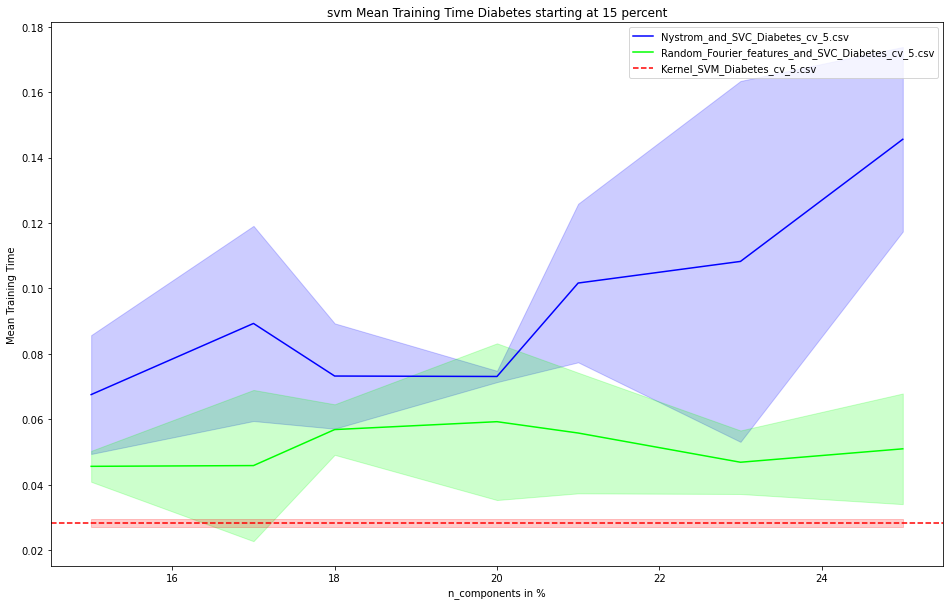

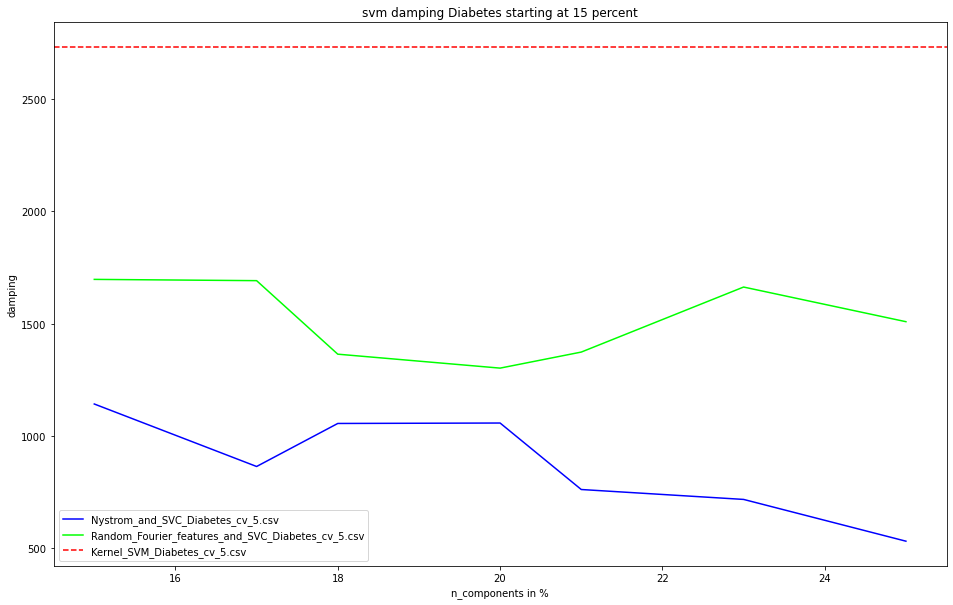

In [7]:
view_plots_and_save_them(df_list = svm_list, df_list_names=svm_list_names,
            names_of_std_for_column=names_of_std_for_column, type ='svm',
            columns=columns, database=database, plot_path = plot_path,
            percent_of_n_components_bigger_than = 0)
view_plots_and_save_them(df_list = svm_list, df_list_names=svm_list_names,
            names_of_std_for_column=names_of_std_for_column, type ='svm',
            columns=columns, database=database, plot_path = plot_path,
            percent_of_n_components_bigger_than = 10)
view_plots_and_save_them(df_list = svm_list, df_list_names=svm_list_names,
            names_of_std_for_column=names_of_std_for_column, type ='svm',
            columns=columns, database=database, plot_path = plot_path,
            percent_of_n_components_bigger_than = 15)

# Hyperparameter

In [8]:
def unique_values(df):
    pd.set_option('display.max_colwidth', None)
    return df.groupby(['Best Parameters', 'File']).size().reset_index(name='Frequency')

df = unique_values(svm_data_verbose)
save_dataframe_as_latex(df, tables_path, 'svm-best-hyperparameters')
df

DataFrame saved as LaTeX table to /Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/Basic-measures/analysis/Diabetes/latex-tables/svm-best-hyperparameters.tex


,Best Parameters,File,Frequency
0,"{'fourier_random_features__gamma': 0.0001220703125, 'svm__C': 100.0}",Random_Fourier_features_and_SVC_Diabetes_cv_5.csv,12
1,"{'fourier_random_features__gamma': 0.0008501470344688711, 'svm__C': 100.0}",Random_Fourier_features_and_SVC_Diabetes_cv_5.csv,9
2,"{'fourier_random_features__gamma': 0.0008501470344688711, 'svm__C': 6.30957344480193}",Random_Fourier_features_and_SVC_Diabetes_cv_5.csv,7
3,"{'fourier_random_features__gamma': 0.005920767837931241, 'svm__C': 100.0}",Random_Fourier_features_and_SVC_Diabetes_cv_5.csv,9
4,"{'fourier_random_features__gamma': 0.005920767837931241, 'svm__C': 6.30957344480193}",Random_Fourier_features_and_SVC_Diabetes_cv_5.csv,10
5,"{'fourier_random_features__gamma': 0.0412346222116529, 'svm__C': 0.3981071705534969}",Random_Fourier_features_and_SVC_Diabetes_cv_5.csv,11
6,"{'fourier_random_features__gamma': 0.0412346222116529, 'svm__C': 100.0}",Random_Fourier_features_and_SVC_Diabetes_cv_5.csv,1
7,"{'fourier_random_features__gamma': 0.0412346222116529, 'svm__C': 6.30957344480193}",Random_Fourier_features_and_SVC_Diabetes_cv_5.csv,5
8,"{'kernel_svm__C': 1.0, 'kernel_svm__gamma': 0.015625}",Kernel_SVM_Diabetes_cv_5.csv,1
9,"{'kernel_svm__C': 10.0, 'kernel_svm__gamma': 0.0013810679320049757}",Kernel_SVM_Diabetes_cv_5.csv,2


In [9]:
df = unique_values(ridge_data_verbose)
save_dataframe_as_latex(df, tables_path, 'ridge-best-hyperparameters')
df

DataFrame saved as LaTeX table to /Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/Basic-measures/analysis/Diabetes/latex-tables/ridge-best-hyperparameters.tex


,Best Parameters,File,Frequency
0,"{'fourier_random_features__gamma': 0.0001220703125, 'ridge_classification__alpha': 0.0001}",Random_Fourier_features_and_ridge_classification_Diabetes_cv_5.csv,18
1,"{'fourier_random_features__gamma': 0.0001220703125, 'ridge_classification__alpha': 0.0031622776601683794}",Random_Fourier_features_and_ridge_classification_Diabetes_cv_5.csv,4
2,"{'fourier_random_features__gamma': 0.0013810679320049757, 'ridge_classification__alpha': 0.0001}",Random_Fourier_features_and_ridge_classification_Diabetes_cv_5.csv,9
3,"{'fourier_random_features__gamma': 0.0013810679320049757, 'ridge_classification__alpha': 0.0031622776601683794}",Random_Fourier_features_and_ridge_classification_Diabetes_cv_5.csv,11
4,"{'fourier_random_features__gamma': 0.0013810679320049757, 'ridge_classification__alpha': 0.1}",Random_Fourier_features_and_ridge_classification_Diabetes_cv_5.csv,4
5,"{'fourier_random_features__gamma': 0.015625, 'ridge_classification__alpha': 0.0001}",Random_Fourier_features_and_ridge_classification_Diabetes_cv_5.csv,1
6,"{'fourier_random_features__gamma': 0.015625, 'ridge_classification__alpha': 0.0031622776601683794}",Random_Fourier_features_and_ridge_classification_Diabetes_cv_5.csv,4
7,"{'fourier_random_features__gamma': 0.015625, 'ridge_classification__alpha': 0.1}",Random_Fourier_features_and_ridge_classification_Diabetes_cv_5.csv,11
8,"{'fourier_random_features__gamma': 0.015625, 'ridge_classification__alpha': 3.1622776601683795}",Random_Fourier_features_and_ridge_classification_Diabetes_cv_5.csv,2
9,"{'kernel_ridge_classification__alpha': 0.0001, 'kernel_ridge_classification__gamma': 0.0001220703125}",Kernel_ridge_classification_Diabetes_cv_5.csv,1
